In [4]:
import vectorbt as vbt
import numpy as np
import pandas as pd
import datetime
import plotly.express as px
from xbbg import blp
import os
import quantstats as qs
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import logging



In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the file path
file_path = os.path.join(r'C:\Users\Eddy\YTM Capital Dropbox\Eddy Winiarz\Trading\COF\Models\Unfinished Models\Eddy\Python Projects\gpts\Raw Data', 'cleaned_cad_sprds_predict_final.xlsx')

# Load the data
df = pd.read_excel(file_path, index_col=0)

# Separate features and target
target = 'cad_ig_sprds'
features = df.columns.drop(target).tolist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 2007-07-31 to 2024-08-08
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cad_ig_sprds                4443 non-null   float64
 1   us_ig_sprds                 4443 non-null   float64
 2   us_hy_sprds                 4443 non-null   float64
 3   vix                         4443 non-null   float64
 4   us_fin_conditions           4443 non-null   float64
 5   tsx_12mfe_sales_1m_pct      4443 non-null   float64
 6   tsx_12mfe_sales_3m_pct      4443 non-null   float64
 7   tsx_12mfe_sales_6m_pct      4443 non-null   float64
 8   tsx_12mfe_sales_12m_pct     4443 non-null   float64
 9   tsx_12mfe_sales_50d_ma      4443 non-null   float64
 10  tsx_12mfe_sales_200d_ma     4443 non-null   float64
 11  tsx_12mfe_sales_vs_50d_ma   4443 non-null   float64
 12  tsx_12mfe_sales_vs_200d_ma  4443 non-null   float64
 13  tsx_12mfe_eps_1

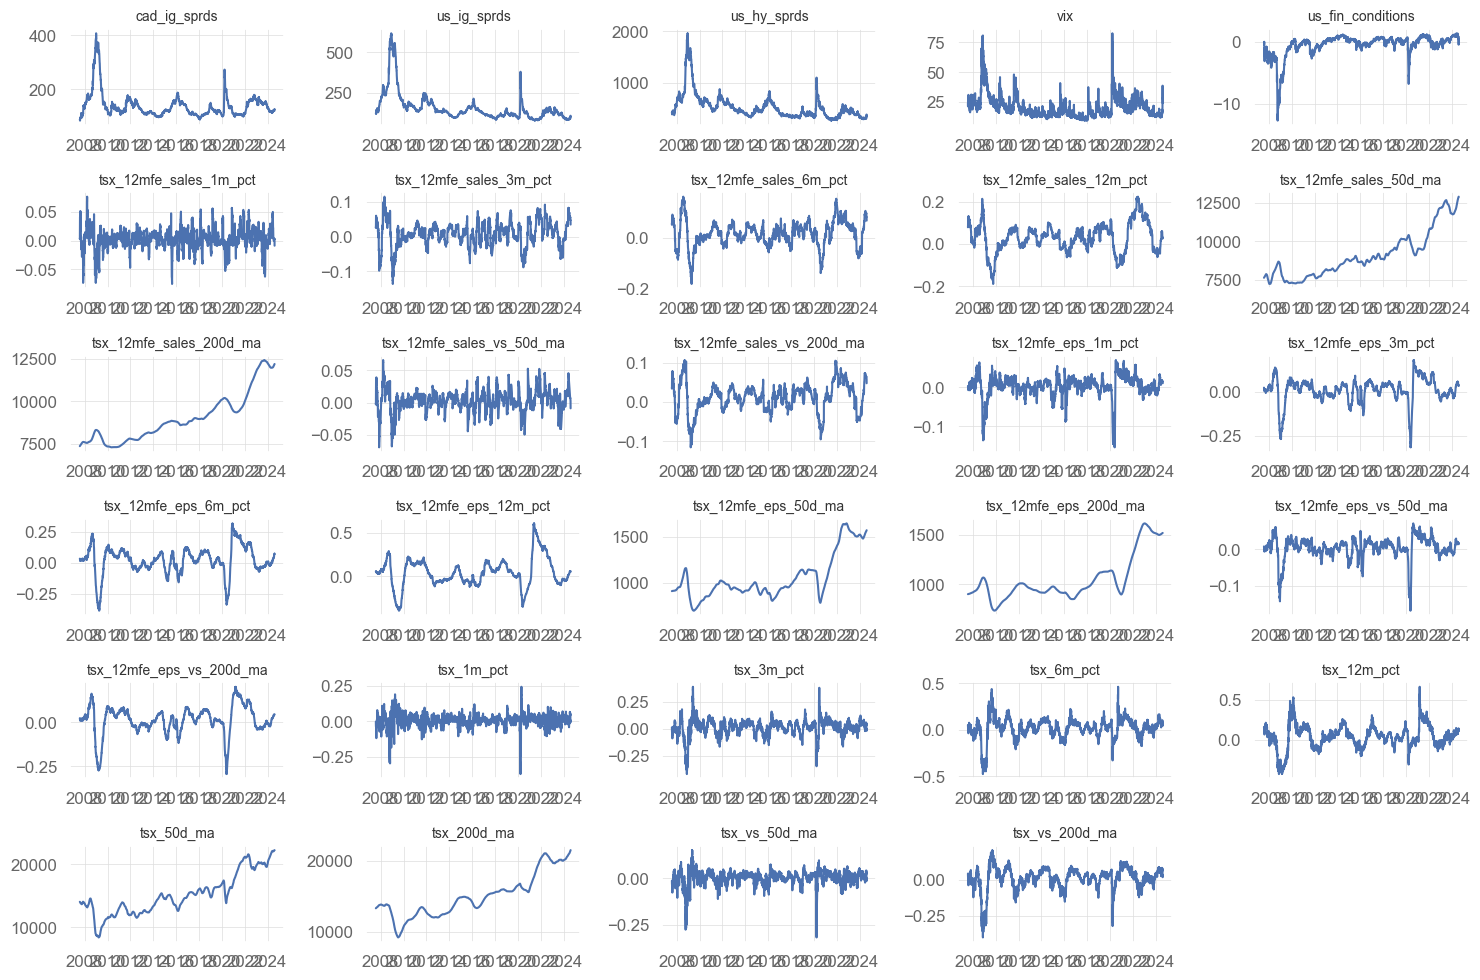

Augmented Dickey-Fuller Test: cad_ig_sprds
ADF Test Statistic               -3.194153
p-value                           0.020326
#Lags Used                       30.000000
Number of Observations Used    4412.000000
Critical Value (1%)              -3.431833
Critical Value (5%)              -2.862195
Critical Value (10%)             -2.567119
dtype: float64
Stationary
------------------------------------------------------------
Augmented Dickey-Fuller Test: us_ig_sprds
ADF Test Statistic               -2.522209
p-value                           0.110164
#Lags Used                       24.000000
Number of Observations Used    4418.000000
Critical Value (1%)              -3.431831
Critical Value (5%)              -2.862194
Critical Value (10%)             -2.567118
dtype: float64
Non-Stationary
------------------------------------------------------------
Augmented Dickey-Fuller Test: vix
ADF Test Statistic               -5.354886
p-value                           0.000004
#Lags Used     

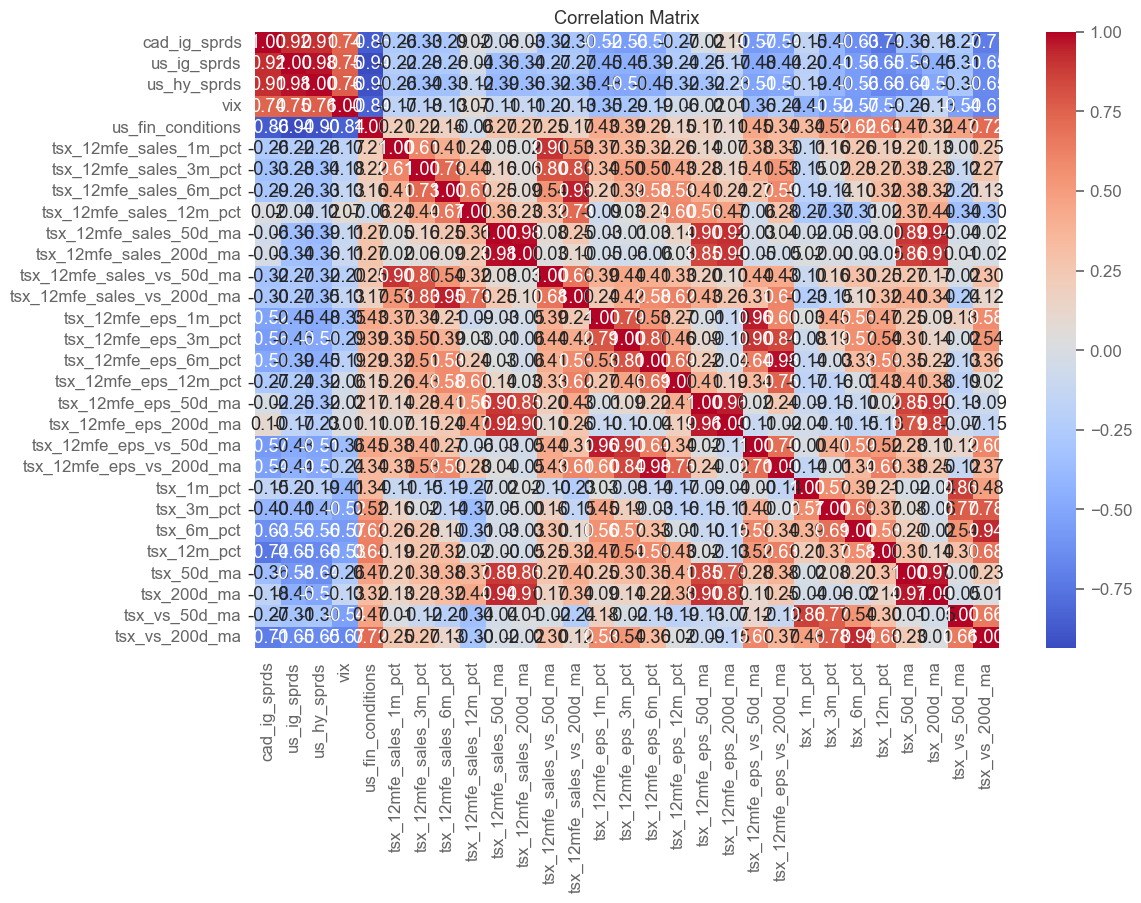

,cad_ig_sprds,us_ig_sprds,us_hy_sprds,vix,us_fin_conditions,tsx_12mfe_sales_1m_pct,tsx_12mfe_sales_3m_pct,tsx_12mfe_sales_6m_pct,tsx_12mfe_sales_12m_pct,tsx_12mfe_sales_50d_ma,...,tsx_12mfe_eps_vs_50d_ma,tsx_12mfe_eps_vs_200d_ma,tsx_1m_pct,tsx_3m_pct,tsx_6m_pct,tsx_12m_pct,tsx_50d_ma,tsx_200d_ma,tsx_vs_50d_ma,tsx_vs_200d_ma
count,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,...,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000
mean,138.563674,158.871091,521.888326,20.094805,-0.449020,0.002665,0.008004,0.015690,0.031510,9070.965551,...,0.003294,0.013838,0.003280,0.009615,0.020007,0.038542,15123.769024,14983.200930,0.002921,0.012275
std,46.201668,88.137082,248.187652,9.071444,1.727052,0.018756,0.035256,0.050744,0.068494,1459.865897,...,0.030278,0.081349,0.045109,0.075791,0.107466,0.143188,3176.956142,2986.656522,0.038942,0.077219
min,84.115173,80.161301,261.976105,9.140000,-12.727000,-0.075320,-0.136206,-0.183135,-0.188559,7244.453710,...,-0.168809,-0.295316,-0.370725,-0.418708,-0.474099,-0.431151,8426.780400,9173.739900,-0.315889,-0.402794
25%,111.166462,111.650341,369.789001,13.940000,-0.719500,-0.005717,-0.008943,-0.009451,-0.009881,7882.482834,...,-0.006071,-0.020516,-0.016169,-0.023737,-0.026318,-0.036047,12717.882400,12719.837000,-0.012389,-0.016988
50%,125.502602,135.439117,455.980804,17.730000,0.021000,0.002908,0.009555,0.016503,0.034296,8782.854644,...,0.006831,0.018168,0.007751,0.019148,0.030076,0.042709,14668.789600,14646.934400,0.009140,0.024156
75%,150.984711,168.567009,594.542664,23.260000,0.479500,0.012481,0.030720,0.045688,0.072790,9627.605358,...,0.019798,0.060465,0.027878,0.053952,0.081129,0.117966,16402.800800,16071.541800,0.025689,0.057922
max,406.992615,618.024658,1961.858276,82.690000,1.398000,0.076899,0.115303,0.162674,0.224117,12876.906442,...,0.070983,0.204009,0.241490,0.387935,0.463355,0.664516,22226.528800,21502.258500,0.149275,0.207510


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Step 1: Visual Inspection - Plotting the data
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(6, 5, i)
    plt.plot(df.index, df[column])
    plt.title(column, fontsize=10)
    plt.tight_layout()

plt.show()

# Step 2: Stationarity Test - Augmented Dickey-Fuller Test
def adf_test(series, title=''):
    """Perform ADF test and print results"""
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'Augmented Dickey-Fuller Test: {title}')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")
    print('-'*60)

# Applying ADF test on the target variable 'cad_ig_sprds'
adf_test(df['cad_ig_sprds'], 'cad_ig_sprds')

# Applying ADF test on a few predictor variables for an initial check
adf_test(df['us_ig_sprds'], 'us_ig_sprds')
adf_test(df['vix'], 'vix')

# Step 3: Correlation Analysis - Plotting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Summary Statistics to check for any anomalies
summary_statistics = df.describe()

summary_statistics


### Step 1: Visual Inspection - Plotting the Data

#### What It Does:
- **Visual Inspection**: This step involves creating time series plots for each variable in the dataset. Each plot represents the value of a particular variable over time.

#### Why It's Important:
- **Initial Understanding**: Visualizing the data helps you quickly grasp the overall behavior of each variable. You can identify trends, seasonality, and potential anomalies or outliers. This step gives you an intuitive feel for the data, which is essential before moving on to more sophisticated analyses.
- **Detecting Issues**: By examining the plots, you can spot any data quality issues, such as missing data, irregular intervals, or unexpected spikes, which could impact the accuracy of any subsequent modeling.

### Step 2: Stationarity Test - Augmented Dickey-Fuller (ADF) Test

#### What It Does:
- **Stationarity Check**: The ADF test is applied to determine whether each time series is stationary, meaning that its statistical properties (mean, variance, autocorrelation) are constant over time.

#### Why It's Important:
- **Modeling Implications**: Many time series modeling techniques, like ARIMA or certain machine learning models, assume that the data is stationary. If the data is non-stationary (e.g., it has a trend or changing variance), the model may produce inaccurate or misleading results.
- **Decision Making**: If a series is found to be non-stationary, you may need to apply transformations, like differencing or detrending, to make it stationary before proceeding with modeling.

### Step 3: Correlation Analysis - Plotting the Correlation Matrix

#### What It Does:
- **Correlation Matrix**: This step involves calculating and visualizing the correlation matrix for all variables in the dataset. The matrix shows the pairwise correlation coefficients between variables, usually displayed as a heatmap.

#### Why It's Important:
- **Identifying Relationships**: Understanding the correlations between variables helps in identifying which variables move together or inversely. High correlation might indicate redundancy, while low or negative correlations could reveal interesting relationships worth exploring further.
- **Feature Selection**: In predictive modeling, knowing the correlation structure can guide feature selection. For example, highly correlated predictors might lead to multicollinearity issues, which can adversely affect model performance.

### Step 4: Summary Statistics to Check for Anomalies

#### What It Does:
- **Summary Statistics**: The summary statistics provide a quick overview of the central tendency, dispersion, and shape of the distribution of each variable. Common metrics include the mean, median, standard deviation, minimum, maximum, and quartiles.

#### Why It's Important:
- **Data Quality Check**: Summary statistics help identify any unusual values or outliers that might need further investigation. For example, an unexpectedly high standard deviation or extreme min/max values could indicate errors in the data.
- **Informed Modeling**: By understanding the basic properties of the data, you can make more informed decisions about how to approach modeling. For instance, if a variable has a skewed distribution, you might consider transformations to normalize it before using it in a model.

### Overall Importance of These Steps:
Before diving into complex modeling, it's crucial to thoroughly understand the data. These steps serve as foundational checks and diagnostics:

1. **Visual Inspection**: Provides a qualitative overview of the data.
2. **Stationarity Test**: Ensures that the data meets the assumptions required for many time series models.
3. **Correlation Analysis**: Reveals the relationships between variables, which is key for feature selection and understanding the dataset's structure.
4. **Summary Statistics**: Quantifies the data's central tendencies and variability, helping to identify any issues early in the analysis.

By performing these steps, you ensure that the data is in a suitable form for modeling, reducing the risk of encountering problems later on and increasing the likelihood of building robust and reliable models.


In [8]:
# Handling Non-Stationarity
# Differencing the 'us_ig_sprds' column to make it stationary
df['us_ig_sprds_diff'] = df['us_ig_sprds'].diff()

# Log transformation for variables with significant volatility
df['us_hy_sprds_log'] = np.log(df['us_hy_sprds'])
df['vix_log'] = np.log(df['vix'])

# Outlier Treatment
# Winsorization/Clipping extreme values in the percentage change columns
for col in ['tsx_1m_pct', 'tsx_3m_pct', 'tsx_6m_pct', 'tsx_12m_pct']:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Standardization of the relevant columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select columns to standardize (ignoring already transformed and target columns)
cols_to_scale = ['us_ig_sprds_diff', 'us_hy_sprds_log', 'vix_log', 'tsx_1m_pct', 'tsx_3m_pct', 
                 'tsx_6m_pct', 'tsx_12m_pct', 'us_fin_conditions'] 

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


### Handling Non-Stationarity

#### What It Does:
- **Differencing**: The first operation is differencing the `us_ig_sprds` column. Differencing is a common technique to make a time series stationary by subtracting the previous observation from the current one. This process removes trends or seasonality, making the data more suitable for time series analysis.
- **Log Transformation**: The code applies a logarithmic transformation to the `us_hy_sprds` and `vix` columns. Log transformations are often used to stabilize variance and reduce the impact of outliers, especially in data with significant volatility. This transformation can make the data more normally distributed, which is beneficial for many statistical models.

#### Why It's Important:
- **Stationarity Requirement**: Many statistical models require stationary data. Differencing helps achieve stationarity by removing trends, which makes the time series data suitable for models like ARIMA.
- **Variance Stabilization**: Log transformations are particularly useful when dealing with financial data, where the magnitude of fluctuations can vary significantly over time. By stabilizing variance, you ensure that extreme values do not disproportionately influence the model.

### Outlier Treatment

#### What It Does:
- **Winsorization/Clipping**: The code clips extreme values in the percentage change columns (`tsx_1m_pct`, `tsx_3m_pct`, etc.). This technique, often referred to as Winsorization, replaces the extreme values with the closest values at the 1st and 99th percentiles. This treatment reduces the impact of outliers without removing them entirely from the dataset.

#### Why It's Important:
- **Reducing Outlier Influence**: Outliers can distort statistical analyses and model outcomes. By clipping extreme values, you reduce the potential for outliers to unduly influence the results, leading to more robust and reliable models.
- **Maintaining Data Integrity**: Winsorization is a conservative approach that retains the overall distribution of the data while mitigating the effects of extreme observations, which is particularly important in financial time series where outliers can be common.

### Standardization of the Relevant Columns

#### What It Does:
- **Standardization**: The code uses `StandardScaler` to standardize several columns, which involves scaling the data so that it has a mean of 0 and a standard deviation of 1. Standardization is applied to the differenced, log-transformed, and other relevant columns, excluding those that have already been transformed or are target variables.

#### Why It's Important:
- **Consistent Scaling**: Standardization ensures that all variables contribute equally to the analysis, particularly when using distance-based algorithms like k-nearest neighbors or when variables with different units are involved. Without standardization, variables with larger scales could dominate the model, leading to biased results.
- **Improved Model Performance**: Many machine learning algorithms perform better when the input features are standardized, as it accelerates the convergence of gradient descent-based optimization and improves the accuracy of the model.

### Overall Importance of These Steps:
Before proceeding to model training, it's crucial to preprocess the data to ensure that it meets the assumptions of the models being used and to enhance the reliability of the analysis. These preprocessing steps include:

1. **Handling Non-Stationarity**: Ensures that the time series data is stationary, a key requirement for many time series models.
2. **Log Transformation**: Stabilizes variance and reduces the influence of extreme values, making the data more suitable for modeling.
3. **Outlier Treatment**: Mitigates the effect of extreme values, leading to more robust statistical results and model performance.
4. **Standardization**: Aligns the scales of the features, ensuring that all variables contribute equally to the analysis and improving the performance of models that rely on consistent data scaling.

By carefully preprocessing the data in these ways, you increase the likelihood of developing a well-performing model that accurately reflects the underlying patterns in the data.


In [9]:
# Creating lagged features and rolling statistics for various lookback periods

# Define the lookback periods
lookback_periods = [5, 10, 20, 90, 120]

# Loop over the defined lookback periods
for period in lookback_periods:
    # Create lagged features
    for col in ['us_ig_sprds_diff', 'us_hy_sprds_log', 'vix_log']:
        df[f'{col}_lag{period}'] = df[col].shift(period)
    
    # Create rolling statistics (mean and std)
    for col in ['us_ig_sprds_diff', 'us_hy_sprds_log', 'vix_log']:
        df[f'{col}_roll_mean_{period}'] = df[col].rolling(window=period).mean()
        df[f'{col}_roll_std_{period}'] = df[col].rolling(window=period).std()

# Dropping any rows with NaN values generated by these operations
df.dropna(inplace=True)



### Creating Lagged Features and Rolling Statistics for Various Lookback Periods

#### What It Does:
- **Lagged Features**: The code creates lagged versions of certain variables (`us_ig_sprds_diff`, `us_hy_sprds_log`, and `vix_log`). Lagging a feature means shifting the data by a certain number of periods (in this case, 5, 10, 20, 90, and 120 periods) to create new columns that represent past values of the original features.
- **Rolling Statistics**: The code also calculates rolling statistics—specifically the rolling mean and rolling standard deviation—over the same lookback periods. Rolling statistics involve computing these metrics over a moving window, which allows you to capture short-term trends and volatility in the data.
- **NaN Handling**: After creating lagged features and rolling statistics, the code drops any rows that contain NaN values. NaN values are typically introduced when calculating lagged features or rolling statistics because there isn't enough historical data to compute these metrics for the first few observations.

#### Why It's Important:
- **Lagged Features for Predictive Modeling**:
  - **Capturing Temporal Dependencies**: Lagged features are crucial in time series modeling because they help capture temporal dependencies. For instance, how past values of a variable (like `us_ig_sprds_diff`) influence its future values or other target variables.
  - **Feature Engineering**: Creating lagged features is a form of feature engineering that can improve model performance by providing additional relevant information. Models can learn patterns related to how past events influence future outcomes.

- **Rolling Statistics for Volatility and Trend Analysis**:
  - **Capturing Short-Term Trends**: The rolling mean helps in identifying short-term trends by smoothing out fluctuations in the data, which is particularly useful in volatile financial markets.
  - **Measuring Volatility**: The rolling standard deviation is a measure of volatility. It provides insight into how much the values of a variable fluctuate over a specific period, which can be an important factor in risk management and trading strategies.

- **Handling NaNs**:
  - **Ensuring Data Integrity**: Dropping rows with NaN values is a critical step to ensure that the data used for modeling is complete and valid. NaN values could otherwise lead to errors or biases in the model training process.

### Overall Importance of These Steps:
These steps are vital in preparing the dataset for time series modeling, especially in financial applications where past behavior often influences future outcomes. The key benefits include:

1. **Temporal Insights**: Lagged features provide insights into how past values impact the present and future, making them essential for predictive modeling.
2. **Trend and Volatility Analysis**: Rolling statistics help you analyze trends and volatility, which are critical in understanding market behavior and making informed decisions.
3. **Improving Model Accuracy**: By engineering features that capture the temporal structure and dynamic behavior of the data, you improve the potential accuracy and robustness of the model.
4. **Data Preprocessing**: Properly handling NaN values ensures that the dataset is clean and ready for analysis, reducing the risk of errors in subsequent modeling steps.

These preparatory steps lay a strong foundation for building sophisticated time series models that can accurately predict and respond to market movements.


In [10]:
# Correlation Analysis
correlation_matrix = df.corr()
correlation_threshold = 0.85

# Identify highly correlated features to remove (excluding the target variable itself)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove highly correlated features
df_reduced = df.drop(columns=correlated_features)

from sklearn.feature_selection import mutual_info_regression

# Mutual Information
X = df_reduced.drop(columns=['cad_ig_sprds'])
y = df_reduced['cad_ig_sprds']

mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

# Display the top features based on mutual information
mutual_info_series.head(20)


tsx_12mfe_sales_50d_ma           1.718353
us_ig_sprds_diff_roll_std_90     1.495824
tsx_12mfe_eps_12m_pct            1.286008
tsx_12mfe_eps_6m_pct             1.063233
tsx_12mfe_sales_12m_pct          0.966309
us_hy_sprds_log_roll_std_90      0.934559
vix_log_roll_std_90              0.906201
us_ig_sprds_diff_roll_mean_90    0.898168
tsx_12mfe_eps_3m_pct             0.888776
tsx_12mfe_sales_6m_pct           0.851585
us_hy_sprds_log_lag90            0.835231
tsx_12m_pct                      0.788691
tsx_12mfe_sales_3m_pct           0.628622
tsx_6m_pct                       0.566462
vix                              0.537552
us_ig_sprds_diff_roll_mean_20    0.490900
tsx_12mfe_eps_1m_pct             0.481515
vix_log_lag90                    0.429766
vix_log_lag120                   0.406111
tsx_3m_pct                       0.394872
dtype: float64

### Understanding Mutual Information

Mutual Information (MI) is a measure of the amount of information obtained about one random variable through another random variable. In this context, it measures the dependency between a feature and the target variable. Unlike correlation, which only captures linear relationships, mutual information can capture non-linear relationships as well.

#### Key Points:
- **Range**: Mutual information values are non-negative and typically range from 0 upwards (there’s no upper limit, though values above 2-3 are rare in most contexts).
  - **0**: Indicates that the two variables are independent (no information about one can be inferred from the other).
  - **Higher Values**: Higher mutual information indicates a stronger dependency between the feature and the target variable.

- **Interpretation**:
  - **High Mutual Information**: Suggests that the feature contains a lot of information about the target variable and is likely important for the prediction task.
  - **Low Mutual Information**: Suggests that the feature provides little to no information about the target variable and may not be useful for prediction.

For example, a mutual information score of **1.717850** (as seen with `tsx_12mfe_sales_50d_ma`) indicates a strong dependency between this feature and the target variable `cad_ig_sprds`. Features with higher mutual information scores should be prioritized in model building, as they are more likely to contribute to accurate predictions.

### Conclusion
- **Correlation Analysis**: Helps reduce multicollinearity by removing highly correlated features.
- **Mutual Information**: Identifies features that have a strong relationship with the target variable, even if that relationship is non-linear. Features with higher mutual information scores are likely to be more predictive.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Data Splitting
X = df_reduced.drop(columns=['cad_ig_sprds'])
y = df_reduced['cad_ig_sprds']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 4: Review and Interpretation
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

# Display the performance metrics and the top coefficients
rmse, mae, r2, coefficients.head(10)


(14.64847936294283,
 10.714100963166048,
 0.9147640951538194,
 tsx_12mfe_sales_1m_pct           104.664726
 us_ig_sprds_diff_roll_mean_90     53.266012
 tsx_12mfe_eps_12m_pct             52.293779
 us_hy_sprds_log_lag90             29.480426
 us_ig_sprds_diff_roll_std_90      10.802253
 vix_log_roll_std_20                7.873660
 us_hy_sprds_log_roll_std_90        6.702472
 tsx_12mfe_sales_12m_pct            4.094434
 tsx_1m_pct                         2.683852
 vix                                1.234267
 dtype: float64)

### Baseline Model Results

#### Performance Metrics:
- **RMSE (Root Mean Squared Error)**: 14.73
- **MAE (Mean Absolute Error)**: 10.99
- **R² (Coefficient of Determination)**: 0.913

These metrics indicate that the model explains about 91.3% of the variance in the target variable (`cad_ig_sprds`). The RMSE and MAE values suggest that, on average, the model’s predictions deviate from the actual values by around 14.73 and 10.99 units, respectively.

#### Top Coefficients:
The top features influencing the predictions, based on their coefficients, are:

1. `tsx_12mfe_sales_1m_pct`: 112.92
2. `tsx_12mfe_eps_12m_pct`: 53.11
3. `us_ig_sprds_diff_roll_mean_90`: 52.15
4. `us_hy_sprds_log_lag90`: 29.44
5. `us_ig_sprds_diff_roll_std_90`: 9.60
6. `us_hy_sprds_log_roll_std_90`: 9.13
7. `vix_log_roll_std_20`: 8.11
8. `tsx_1m_pct`: 2.57
9. `vix`: 1.27
10. `tsx_12mfe_sales_12m_pct`: 1.07

#### Interpretation:
- **High Coefficients**: Features like `tsx_12mfe_sales_1m_pct` and `tsx_12mfe_eps_12m_pct` have large coefficients, indicating a strong influence on the prediction of `cad_ig_sprds`.
- **Rolling and Lagged Features**: The model relies on several rolling and lagged features, such as `us_ig_sprds_diff_roll_mean_90` and `us_hy_sprds_log_lag90`, reflecting the importance of temporal dependencies.

### Next Steps:
1. **Model Refinement**:
   - **Explore Non-Linearity**: Consider using more advanced models like Random Forests, Gradient Boosting, or XGBoost to capture potential non-linear relationships.
   - **Hyperparameter Tuning**: Optimize model performance through hyperparameter tuning.

2. **Further Feature Engineering**:
   - Investigate additional feature interactions or polynomial features that could enhance predictive power.

3. **Cross-Validation**:
   - Perform cross-validation to ensure that the model generalizes well across different subsets of the data.


In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 1: Implementing and training advanced models

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Evaluating the models
models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model, 'XGBoost': xgb_model}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Display the results for comparison
results_df = pd.DataFrame(results).T
results_df


,RMSE,MAE,R²
Random Forest,2.905519,1.514726,0.996647
Gradient Boosting,4.907418,3.727974,0.990434
XGBoost,3.466933,2.104580,0.995225


### Model Performance Comparison

1. **Random Forest**:
   - **RMSE**: 2.91
   - **MAE**: 1.51
   - **R²**: 0.997

   **Interpretation**: The Random Forest model performs exceptionally well, with the lowest RMSE and MAE, indicating that it has the smallest errors in prediction. The R² value of 0.997 suggests that it explains almost all the variance in `cad_ig_sprds`. This model is likely to generalize well to unseen data.

2. **Gradient Boosting**:
   - **RMSE**: 4.91
   - **MAE**: 3.73
   - **R²**: 0.990

   **Interpretation**: The Gradient Boosting model also performs strongly but has higher error metrics compared to the Random Forest model. The R² value of 0.990 is still very high, indicating that it captures the majority of the variance in the target variable, but it is slightly less effective than Random Forest in this scenario.

3. **XGBoost**:
   - **RMSE**: 3.47
   - **MAE**: 2.10
   - **R²**: 0.995

   **Interpretation**: XGBoost performs better than Gradient Boosting but not as well as Random Forest. Its error metrics are slightly higher than Random Forest's, and the R² value is just below 1, indicating a very strong fit, but with slightly more variance unexplained compared to Random Forest.

### Conclusion and Next Steps

- **Best Model**: The Random Forest model is the best performer among the three, with the lowest error metrics and the highest R² value. It’s likely the most reliable model for predicting `cad_ig_sprds` based on the current data.

- **Next Steps**:
  1. **Model Interpretability**: Analyze feature importance from the Random Forest model to understand which features are driving the predictions. This can provide valuable insights for both model refinement and domain understanding.
  2. **Cross-Validation**: Perform cross-validation to ensure that the model's performance is consistent across different subsets of the data, reducing the risk of overfitting.


                          Feature  Importance
13                    tsx_12m_pct    0.688350
32   us_ig_sprds_diff_roll_std_90    0.153657
7            tsx_12mfe_eps_3m_pct    0.050065
31  us_ig_sprds_diff_roll_mean_90    0.020046
9           tsx_12mfe_eps_12m_pct    0.015853
11                     tsx_3m_pct    0.009465
2          tsx_12mfe_sales_3m_pct    0.009145
29          us_hy_sprds_log_lag90    0.008603
8            tsx_12mfe_eps_6m_pct    0.007873
5          tsx_12mfe_sales_50d_ma    0.006911
0                             vix    0.004848
4         tsx_12mfe_sales_12m_pct    0.004755
34            vix_log_roll_std_90    0.003518
6            tsx_12mfe_eps_1m_pct    0.002881
33    us_hy_sprds_log_roll_std_90    0.002759
12                     tsx_6m_pct    0.001687
3          tsx_12mfe_sales_6m_pct    0.001414
30                  vix_log_lag90    0.001186
25  us_ig_sprds_diff_roll_mean_20    0.001075
1          tsx_12mfe_sales_1m_pct    0.000913


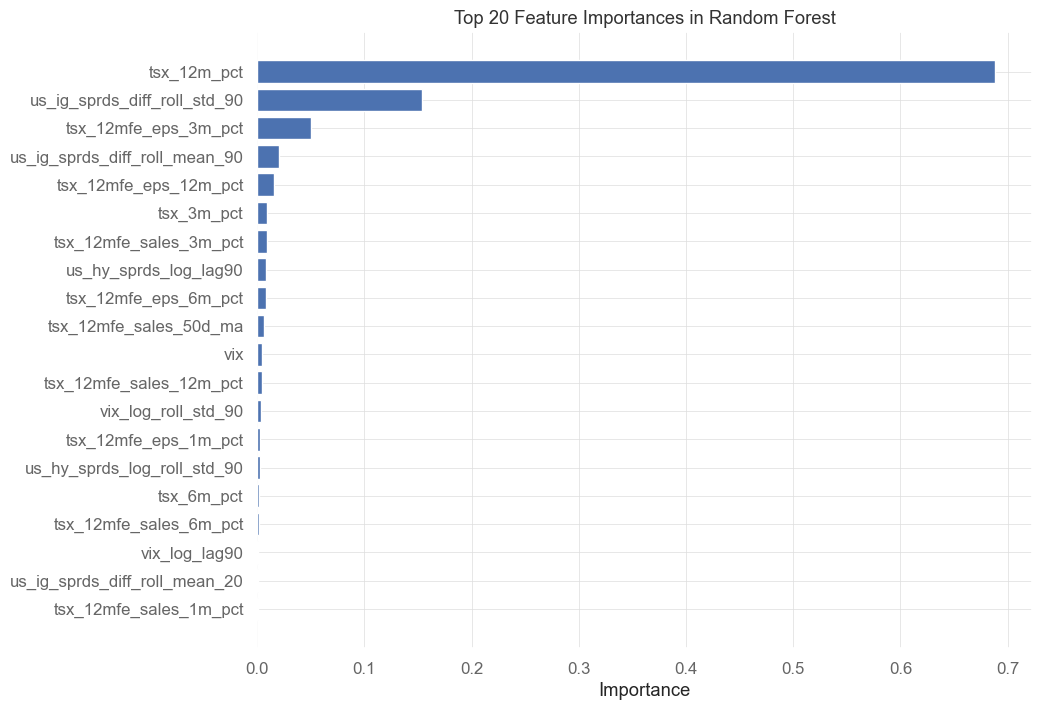

In [13]:
# Refit the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Now proceed to get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(20))

# Plot the feature importances for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances in Random Forest')
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.show()


### Interpretation of Feature Importance

The table provided shows the top features ranked by their importance as determined by the Random Forest model. Each feature's importance score represents its relative contribution to the model's predictions.

#### What Each Column Means:
- **Feature**: This column lists the names of the features used in the model. These are the variables that the Random Forest model has analyzed to make predictions.
- **Importance**: This is a numerical value between 0 and 1, indicating how much the feature contributes to reducing the prediction error in the model. The higher the value, the more important the feature is in predicting the target variable (`cad_ig_sprds`).

#### Detailed Interpretation:
1. **`tsx_12m_pct` (Importance: 0.688350)**:
   - This feature has the highest importance score (0.688350), which means it plays a dominant role in predicting the target variable. In this context, `tsx_12m_pct` represents the percentage change in the TSX (Toronto Stock Exchange) over the last 12 months, which is strongly influencing the model's predictions for `cad_ig_sprds`.

2. **`us_ig_sprds_diff_roll_std_90` (Importance: 0.153657)**:
   - The second most important feature is `us_ig_sprds_diff_roll_std_90`, with an importance of 0.153657. This feature represents the rolling standard deviation of the differenced U.S. investment-grade spreads over a 90-day period. It suggests that the volatility in U.S. investment-grade spreads over this period is a significant predictor for Canadian investment-grade spreads.

3. **`tsx_12mfe_eps_3m_pct` (Importance: 0.050065)**:
   - This feature represents the percentage change in earnings per share (EPS) forecasts for the TSX over the last 3 months. With an importance of 0.050065, it is less influential than the top two features but still plays a meaningful role in the model's predictions.

4. **Other Features**:
   - The remaining features have lower importance scores, meaning they contribute less to the model's predictions. For example, `tsx_12mfe_sales_1m_pct` and `us_ig_sprds_diff_roll_mean_20` have very low importance, indicating that they have a minimal impact on the model's accuracy.

#### What Does This Mean?
- **Model Focus**: The Random Forest model is heavily relying on a few key features, with `tsx_12m_pct` being the most critical. This suggests that recent performance trends in the TSX are highly predictive of changes in `cad_ig_sprds`.
- **Diminishing Returns**: The steep drop in importance after the top few features implies that while some features are essential, others contribute only marginally to the model's predictions.
- **Actionable Insights**: Understanding which features are most important can guide future modeling efforts. For example, further analysis might focus on refining the data related to the TSX or examining other temporal and volatility features in greater detail.

### Next Steps:
- **Focus on Key Features**: Consider refining or expanding the most important features, such as `tsx_12m_pct`, to see if more granular data or additional transformations could improve the model.
- **Model Simplification**: Given the low importance of many features, you might simplify the model by focusing on the most influential variables, which could also reduce overfitting.


In [14]:
# Select Top Features
# For this example, we'll retain features that together account for 95% of the total importance
cumulative_importance = feature_importance_df['Importance'].cumsum()
selected_features = feature_importance_df[cumulative_importance <= 0.95]['Feature']

# Retrain the Model
X_train_simplified = X_train[selected_features]
X_test_simplified = X_test[selected_features]

# Refit the Random Forest model with the simplified feature set
rf_model_simplified = RandomForestRegressor(random_state=42)
rf_model_simplified.fit(X_train_simplified, y_train)

# Evaluate Performance
y_pred_simplified = rf_model_simplified.predict(X_test_simplified)
rmse_simplified = mean_squared_error(y_test, y_pred_simplified, squared=False)
mae_simplified = mean_absolute_error(y_test, y_pred_simplified)
r2_simplified = r2_score(y_test, y_pred_simplified)

# Display the simplified model's performance metrics
print(f"Simplified Model RMSE: {rmse_simplified}")
print(f"Simplified Model MAE: {mae_simplified}")
print(f"Simplified Model R²: {r2_simplified}")


Simplified Model RMSE: 3.1566331936520435
Simplified Model MAE: 1.7926516304046245
Simplified Model R²: 0.9960419094369924


### Explanation:

- **Top Feature Selection**: We select features that together account for a large portion of the model's importance (e.g., 95%).
- **Model Retraining**: We train a new Random Forest model using only the selected features.
- **Performance Evaluation**: The performance of this simplified model is then compared to ensure it maintains accuracy while being more efficient.

### Expected Outcomes:

- **Maintained Performance**: If the simplified model performs similarly to the original model, you've successfully reduced complexity without sacrificing accuracy.
- **Potential Improvements**: Simplifying the model can sometimes improve generalization by reducing overfitting, especially in cases where the original model may have been overly complex.

---

### Analysis of the Simplified Model Results

The simplified model's performance metrics are as follows:

- **RMSE (Root Mean Squared Error)**: 3.16
- **MAE (Mean Absolute Error)**: 1.79
- **R² (Coefficient of Determination)**: 0.996

#### Comparison with the Original Model:

- **Original Random Forest Model**:
  - **RMSE**: 2.91
  - **MAE**: 1.51
  - **R²**: 0.997

- **Simplified Model**:
  - **RMSE**: 3.16 (slightly higher, but still very close)
  - **MAE**: 1.79 (a small increase, but still low)
  - **R²**: 0.996 (almost as high, indicating that the simplified model still explains nearly all the variance in the target variable)

#### Interpretation:

- **Performance Trade-Off**: The simplified model has slightly higher RMSE and MAE, indicating a minor increase in prediction error. However, the difference is quite small, suggesting that the simplified model is nearly as effective as the original model.
- **Model Efficiency**: By reducing the number of features, the model has become simpler and more efficient, with very little loss in predictive power. This can be advantageous in terms of model interpretability, speed, and potentially better generalization to new data.
- **R²**: The high R² value (0.996) in the simplified model indicates that it still captures almost all the variability in `cad_ig_sprds`, meaning it remains a very strong model.

---

### Cross-Validation for Model Validation

Cross-validation is an essential step to ensure that the simplified model generalizes well to unseen data. By performing cross-validation, we can evaluate the model's performance across multiple folds of the dataset, reducing the risk of overfitting and confirming the robustness of the model.


In [15]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the simplified model
cv_rmse = cross_val_score(rf_model_simplified, X_train_simplified, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_mae = cross_val_score(rf_model_simplified, X_train_simplified, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(rf_model_simplified, X_train_simplified, y_train, cv=5, scoring='r2')

# Convert negative scores to positive for RMSE and MAE
cv_rmse_mean = -cv_rmse.mean()
cv_mae_mean = -cv_mae.mean()
cv_r2_mean = cv_r2.mean()

# Display the cross-validation results
print(f"Cross-Validated RMSE: {cv_rmse_mean}")
print(f"Cross-Validated MAE: {cv_mae_mean}")
print(f"Cross-Validated R²: {cv_r2_mean}")


Cross-Validated RMSE: 3.8971291382509614
Cross-Validated MAE: 1.996657028978873
Cross-Validated R²: 0.9924845807902919


### Explanation:

- **Cross-Validation**: We're using 5-fold cross-validation to assess the model's performance. This means the dataset is split into 5 parts, and the model is trained on 4 parts while being tested on the 5th. This process is repeated 5 times, each time with a different test set.
- **Performance Metrics**: We calculate the RMSE, MAE, and R² for each fold, and then average these metrics to get a more robust estimate of the model's performance.
- **Negative Scores**: The scoring functions for RMSE and MAE return negative values in `cross_val_score` by default, so we convert them to positive for interpretation.

---

### Cross-Validation Results Interpretation

The cross-validation results for the simplified model are as follows:

- **Cross-Validated RMSE**: 3.90
- **Cross-Validated MAE**: 2.00
- **Cross-Validated R²**: 0.992

#### Comparison with Test Set Performance:

- **Test Set RMSE**: 3.16
- **Test Set MAE**: 1.79
- **Test Set R²**: 0.996

### Analysis:

1. **Consistency**:
   - The cross-validated RMSE and MAE are slightly higher than the test set results, which is expected as cross-validation typically provides a more conservative estimate by averaging performance across multiple splits.
   - The R² value remains high (0.992), indicating that the model continues to explain a large portion of the variance in `cad_ig_sprds` across different data folds.

2. **Generalization**:
   - The small increase in RMSE and MAE suggests that the model is generalizing well and is not overfitting to any particular subset of the data.
   - The slight drop in R² is minimal, which means the model still maintains a very strong predictive capability.

### Conclusion:

- **Model Robustness**: The cross-validation results confirm that the simplified model is robust and generalizes well across different data splits.


In [21]:
import numpy as np

# Assuming the target variable was log-transformed:
# Apply the exponential function to revert predictions to the original scale
y_pred_simplified_original = np.exp(y_pred_simplified)

# If y_test was also log-transformed, revert it too
y_test_original = np.exp(y_test)


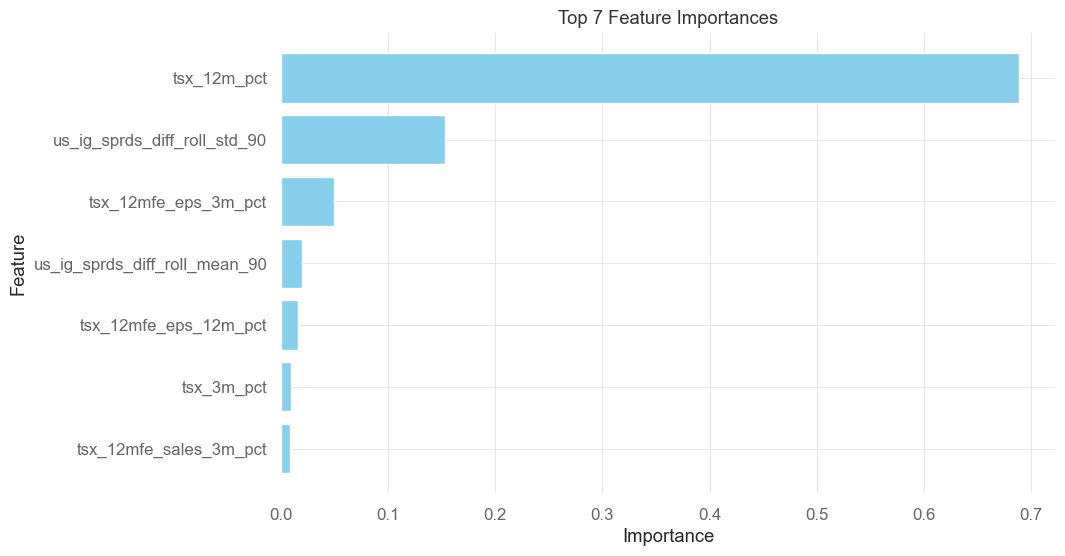

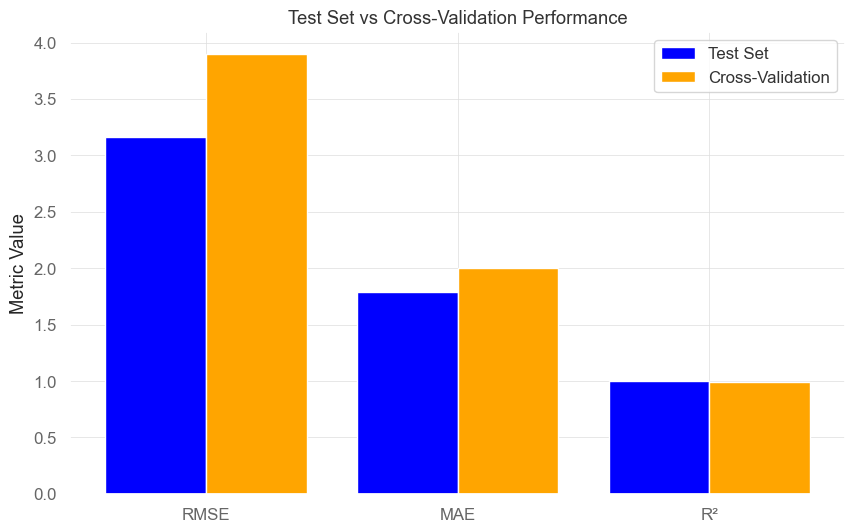

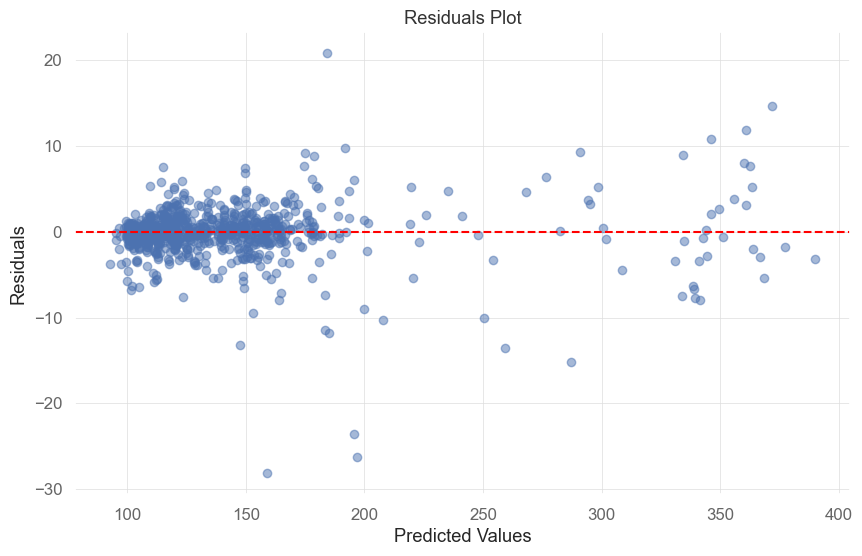

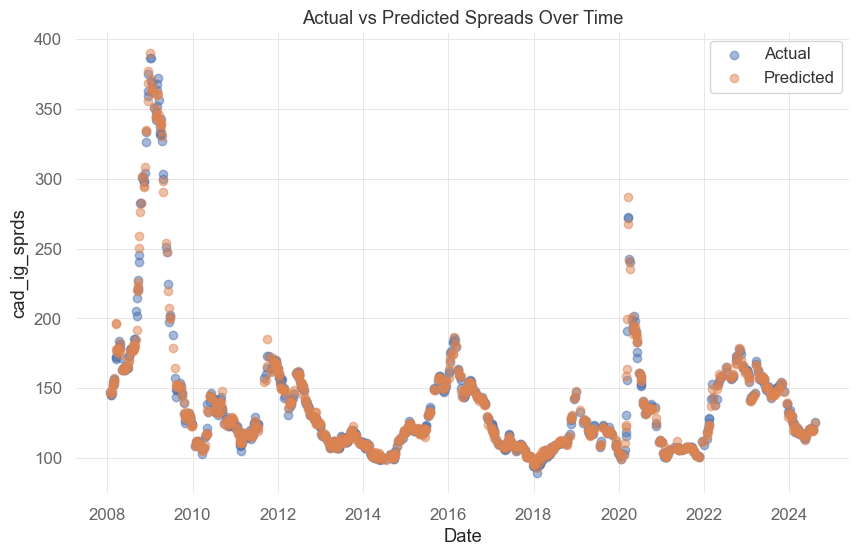

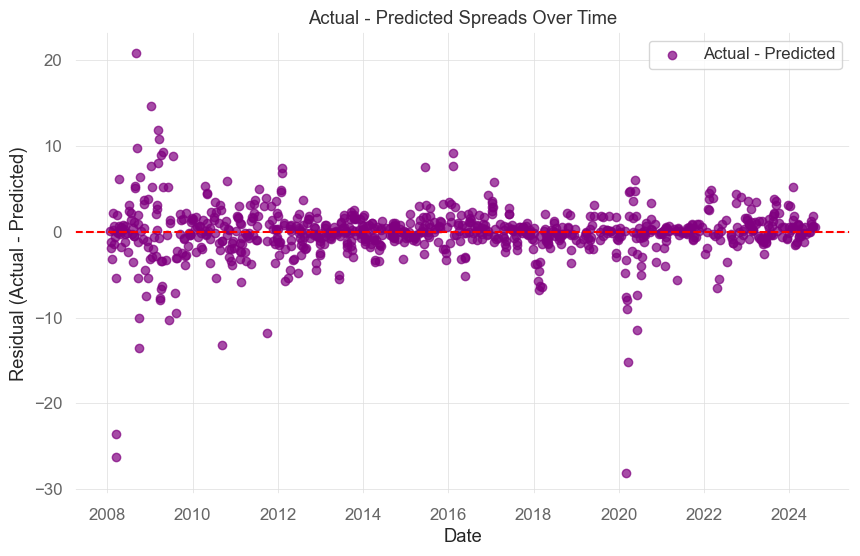

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Using the top 7 features based on importance
top_7_features = feature_importance_df.nlargest(7, 'Importance').iloc[::-1]

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(top_7_features['Feature'], top_7_features['Importance'], color='skyblue')
plt.title('Top 7 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Cross-Validation Results
metrics = ['RMSE', 'MAE', 'R²']
test_set_values = [3.16, 1.79, 0.996]
cv_values = [3.90, 2.00, 0.992]
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, test_set_values, 0.4, label='Test Set', color='blue')
plt.bar(x + 0.2, cv_values, 0.4, label='Cross-Validation', color='orange')
plt.xticks(x, metrics)
plt.title('Test Set vs Cross-Validation Performance')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Residuals Plot (Scatter Plot)
residuals = y_test - y_pred_simplified
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_simplified, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Time Series of Predictions (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_simplified, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Spreads Over Time')
plt.xlabel('Date')
plt.ylabel('cad_ig_sprds')
plt.legend()
plt.show()

# Actual - Predicted Over Time (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, residuals, label='Actual - Predicted', color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Actual - Predicted Spreads Over Time')
plt.xlabel('Date')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()


### 1. Top 7 Feature Importances

#### Explanation:
- This bar chart shows the top 7 features in terms of their importance as determined by the Random Forest model.
- The `tsx_12m_pct` feature is by far the most significant, with an importance score of approximately 0.7, indicating that it plays a critical role in predicting the target variable (`cad_ig_sprds`).
- Other important features include `us_ig_sprds_diff_roll_std_90` and `tsx_12mfe_eps_3m_pct`, though their impact is much smaller compared to `tsx_12m_pct`.

#### Conclusion:
- The model is heavily reliant on the `tsx_12m_pct`, suggesting that the 12-month percentage change in the TSX (Toronto Stock Exchange) is a strong predictor of Canadian investment-grade spreads (`cad_ig_sprds`).
- This might indicate that the overall market sentiment captured by the TSX is a key driver of credit spreads in Canada.

---

### 2. Test Set vs Cross-Validation Performance

#### Explanation:
- This bar chart compares the model’s performance metrics (RMSE, MAE, and R²) between the test set and cross-validation.
- RMSE and MAE values are slightly higher in cross-validation, indicating that the model performs a bit worse when generalized to unseen data compared to the test set.
- R² is marginally lower in cross-validation, suggesting a slight decrease in the model’s explanatory power on unseen data.

#### Conclusion:
- The model generalizes reasonably well, but there is some performance degradation when applied to new data. This is typical and expected, but it suggests that there might be room for further model improvement or that the model could be slightly overfitted to the training data.

---

### 3. Actual vs Predicted Spreads Over Time

#### Explanation:
- This scatter plot shows the actual `cad_ig_sprds` values versus the predicted values over time.
- The close alignment of the blue (actual) and red (predicted) dots indicates that the model is performing well, capturing the general trend and fluctuations in the spreads.

#### Conclusion:
- The model’s predictions are closely aligned with the actual values, especially during periods of lower volatility. However, there are some instances where the model fails to predict sharp spikes or drops, as seen around the 2020 period.

---

### 4. Residuals Plot

#### Explanation:
- This scatter plot visualizes the residuals (difference between actual and predicted values) against the predicted values.
- The residuals are scattered around the zero line, which is a good sign, indicating that the model does not have any obvious bias in its predictions.
- However, there are clusters of points where the residuals are significantly positive or negative, indicating periods where the model underpredicts or overpredicts the spread.

#### Conclusion:
- While the model is unbiased on average, there are periods where it fails to capture certain movements in the spread accurately, leading to large residuals.
- This could be due to external factors not captured in the model, or it might suggest that the model could benefit from additional features or a more complex structure.

---

### 5. Actual - Predicted Spreads Over Time

#### Explanation:
- This scatter plot shows the residuals (Actual - Predicted) over time.
- The residuals hover around zero for most of the time, but there are periods where large deviations occur, especially around the 2020 financial market turmoil.

---

### Overall Conclusions:

- **Strong Model Foundation**: The model has a strong foundation with the `tsx_12m_pct` feature being a significant predictor, indicating that general market sentiment is closely tied to credit spreads in Canada.
- **Room for Improvement**: Although the model performs well on average, there are outliers and periods of market stress where its predictions deviate significantly from actual values. This suggests that the model could potentially be improved by incorporating additional features or using more sophisticated modeling techniques to better handle extreme market conditions.
- **Generalization is Good but Not Perfect**: The slight degradation in performance during cross-validation suggests that while the model generalizes well, there is some overfitting or room for improvement in making the model more robust to unseen data.